# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./US Natural Disaster Declarations/us_disaster_declarations.csv")

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

> Taking a quick look over of the data - a few of the fields are redundant or not useful for the analysis. A few of the fields are also not likely to play well with our analysis tools (e.g. the designated_area county fields), and while they require more specific geospatial tools that are not within the bounds of the course, I'll leave them in on the off-chance that later tools and visualizations can parse them. Also notable is that the dataset includes biological disasters, manmade disasters, nuclear incidents, dam breaks, and so on - while not entirely relevant to the immediate analysis which will take a more climate based approach, I'm leaving it in for the moment in case the initial analysis proves uninteresting or somehow too narrow.

https://www.kaggle.com/datasets/headsortails/us-natural-disaster-declarations 

In [4]:
df.sample(5)

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,place_code,designated_area,declaration_request_number,last_ia_filing_date,incident_id,region,designated_incident_types,last_refresh,hash,id
65242,DR-4781-TX,4781,TX,DR,2024-05-17T00:00:00Z,2024,Flood,"Severe Storms, Straight-Line Winds, Tornadoes,...",1,0,...,99199,Hardin (County),24043,2024-08-15T00:00:00Z,2024042701,6,W,2024-08-27T18:22:14Z,8607b7cab9ada28824a1dd078a2c6a5b47314186,cd05ed4e-88d2-4ee0-856d-fd45340366b4
13748,DR-1054-MO,1054,MO,DR,1995-06-02T00:00:00Z,1995,Severe Storm,"Severe Storms, Tornadoes, Hail, Flooding",0,1,...,99155,Pemiscot (County),95028,NaN,95028,7,"F,T",2024-08-27T18:22:14Z,170e184b89f4f554a08725fe9a9518631808f0a8,7284126b-d6cb-468a-b26b-b5dec6b9d509
62550,DR-4625-NY,4625,NY,DR,2021-10-08T00:00:00Z,2022,Hurricane,Remnants Of Tropical Storm Fred,0,0,...,99065,Oneida (County),21105,NaN,2021080901,2,NaN,2024-08-27T18:22:14Z,c74cd1b70343d3add3d799623849f7eedb25ad5c,819f4c1f-7b47-4f30-8730-b2d9064dcbb9
44404,DR-4210-WV,4210,WV,DR,2015-03-31T00:00:00Z,2015,Severe Storm,"Severe Winter Storm, Flooding, Landslides, And...",0,0,...,99045,Logan (County),15006,NaN,2015031001,3,NaN,2024-08-27T18:22:14Z,f81b86558390d63bc4c5d8ac01b991b287e54669,706b1dca-3ae1-4c54-a67a-aa12340ba1db
18193,DR-1256-MO,1256,MO,DR,1998-10-19T00:00:00Z,1999,Severe Storm,Severe Storms And Flooding,0,1,...,99189,St. Louis (County),98059,NaN,8072700001,7,F,2024-08-27T18:22:14Z,d696ac580001bcd79e127181cad134f77dc00983,983bec57-768d-46e2-8db0-167bcf9a8c41


In [5]:
# A quick check shows no duplicates
df.duplicated().value_counts()

False    68485
Name: count, dtype: int64

In [6]:
# For each column, I'll want to count null fields, see where there's missing data
print("Amount of missing data:")
for col in df.columns:
    print(f"[{col}]: " + str(int(100*df[col].isna().sum()/len(df))) + "%")

Amount of missing data:
[fema_declaration_string]: 0%
[disaster_number]: 0%
[state]: 0%
[declaration_type]: 0%
[declaration_date]: 0%
[fy_declared]: 0%
[incident_type]: 0%
[declaration_title]: 0%
[ih_program_declared]: 0%
[ia_program_declared]: 0%
[pa_program_declared]: 0%
[hm_program_declared]: 0%
[incident_begin_date]: 0%
[incident_end_date]: 0%
[disaster_closeout_date]: 23%
[tribal_request]: 0%
[fips]: 0%
[place_code]: 0%
[designated_area]: 0%
[declaration_request_number]: 0%
[last_ia_filing_date]: 71%
[incident_id]: 0%
[region]: 0%
[designated_incident_types]: 69%
[last_refresh]: 0%
[hash]: 0%
[id]: 0%


In [7]:
# Will start by decluttering a little - removing some but maintaining even a few of 
#   the seemingly irrelevant fields in case they prove interesting.
removed_fields = ('fema_declaration_string', 
          'fy_declared', 
          'hash', 
          'id', 
          'declaration_request_number',
          'tribal_request')

for field in removed_fields:
    try:
        df.drop(field, inplace=True, axis=1)
    except:
        print(f"Key Error; '{field}' was likely already removed or did not exist")

df.sample(5)

,disaster_number,state,declaration_type,declaration_date,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,last_ia_filing_date,incident_id,region,designated_incident_types,last_refresh
45502,4250,MO,DR,2016-01-21T00:00:00Z,Flood,"Severe Storms, Tornadoes, Straight-Line Winds,...",1,0,0,1,...,2016-01-09T00:00:00Z,NaN,29141,99141,Morgan (County),2016-03-21T00:00:00Z,2015122901,7,NaN,2024-08-27T18:22:14Z
53941,3448,VA,EM,2020-03-13T00:00:00Z,Biological,Covid-19,0,0,1,0,...,2023-05-11T00:00:00Z,2020-09-30T00:00:00Z,51119,99119,Middlesex (County),NaN,2020030901,3,NaN,2024-08-27T18:22:14Z
37806,1885,KS,DR,2010-03-09T00:00:00Z,Severe Storm,Severe Winter Storms And Snowstorm,0,0,1,1,...,2010-01-08T00:00:00Z,2016-10-16T00:00:00Z,20149,99149,Pottawatomie (County),NaN,2010022602,7,S,2024-08-27T18:22:14Z
53499,3455,MI,EM,2020-03-13T00:00:00Z,Biological,Covid-19,0,0,1,0,...,2023-05-11T00:00:00Z,2020-07-13T00:00:00Z,26097,99097,Mackinac (County),NaN,2020030901,5,NaN,2024-08-27T18:22:14Z
1865,296,PR,DR,1970-10-12T00:00:00Z,Flood,Heavy Rains & Flooding,0,1,1,0,...,1970-10-12T00:00:00Z,1976-12-23T00:00:00Z,72035,99035,Cayey (Municipio),NaN,70023,2,W,2024-08-27T18:22:14Z


In [8]:
# Creating new date columns for chronology.
# New column = date/time of the beginning date object, cast to string, and sliced to first 10 chars

df['date'] = pd.to_datetime(df['incident_begin_date'].str.slice(0,10))
df['end_date'] = pd.to_datetime(df['incident_end_date'].str.slice(0,10))
df['year'] = df['date'].dt.year

# Considered, but not useful; more interested in the disasters, less in the management side
# disaster_closeout_date
# last_ia_filing_date

In [9]:
print(df['date'].isna().sum())
print(df['end_date'].isna().sum())

0
522


In [10]:
df.sample(3)

,disaster_number,state,declaration_type,declaration_date,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,...,place_code,designated_area,last_ia_filing_date,incident_id,region,designated_incident_types,last_refresh,date,end_date,year
1513,267,KS,DR,1969-07-15T00:00:00Z,Tornado,"Tornadoes, Severe Storms & Flooding",0,1,1,0,...,99037,Crawford (County),NaN,69030,7,"F,T,W",2024-08-27T18:22:14Z,1969-07-15,1969-07-15,1969
53962,3448,VA,EM,2020-03-13T00:00:00Z,Biological,Covid-19,0,0,1,0,...,99167,Russell (County),NaN,2020030901,3,NaN,2024-08-27T18:22:14Z,2020-01-20,2023-05-11,2020
29977,3245,NE,EM,2005-09-13T00:00:00Z,Hurricane,Hurricane Katrina Evacuees,0,0,1,0,...,99087,Hitchcock (County),NaN,2005090806,7,NaN,2024-08-27T18:22:14Z,2005-08-29,2005-10-01,2005


In [11]:
# Now to look at some of the fields that may be interesting...
interesting_fields = ('state','incident_type')
# The fields with dates are of interest as well but will give discrete values instead.
df.value_counts('state')

state
TX    5386
KY    3235
MO    2829
FL    2791
GA    2653
VA    2621
LA    2589
OK    2581
NC    2329
PR    2116
MS    1963
IA    1926
KS    1898
TN    1848
AR    1749
AL    1742
CA    1686
MN    1622
NE    1569
NY    1537
IN    1489
SD    1468
ND    1416
IL    1313
OH    1292
WV    1281
PA    1252
SC    1140
ME    1065
WA    1017
WI     895
MI     819
CO     667
MT     643
OR     637
NJ     627
NM     543
MD     447
MA     414
VT     405
ID     370
AZ     346
AK     344
NH     320
NV     289
CT     266
UT     259
WY     136
RI     123
HI     110
VI      87
MP      76
AS      76
DE      53
MH      53
FM      31
DC      23
GU      22
PW       1
Name: count, dtype: int64

> First and most obvious catch here - the most listed states will usually be the largest ones with hardest-hit developed (urban/residential/agricultural/industrial) areas that demand resolution. Initial inclination may be to normalize the crises by the population of the state at a given time (easy enough with the right census data pulls). However, since we don't have lat/long coordinates, magnitudes, etc., the finest resolution for our data will be on the state level, and part of our core question (particularly what constitutes a crisis that affects people and developed areas) is already well-covered by the fact that these disasters are declared in the first place - a storm out in the middle of nowhere won't pose a threat, and so part of our analysis that we would have had to solve for is already built-in, in a way.

> For the sake of that analysis, in case it reveals anything especially interesting, I created a csv with the state code, state name, and rough surface area in square miles (precision is important but will be irrelevant for this scale and purpose, a few miles off in either direction is fine). I expect that smaller territories like DC will be bumped to the top.

In [12]:
area_of_state = pd.read_csv("./State Info/state-areas.csv")
disasters_by_state = pd.DataFrame(df.value_counts('state').reset_index(name='count'))

print(area_of_state.columns)
print(disasters_by_state.columns)

Index(['state', 'Full Name', 'area (sq. mi)'], dtype='object')
Index(['state', 'count'], dtype='object')


In [13]:
area_and_disasters = pd.merge(disasters_by_state, area_of_state, on='state')
area_and_disasters['density'] = area_and_disasters['count'] / area_and_disasters['area (sq. mi)']
area_and_disasters.sort_values(by='density', ascending=False)

,state,count,Full Name,area (sq. mi),density
9,PR,2116,Puerto Rico,3515,0.601991
51,DC,23,District of Columbia,68,0.338235
1,KY,3235,Kentucky,40411,0.080052
48,RI,123,Rhode Island,1545,0.079612
35,NJ,627,New Jersey,8722,0.071887
5,VA,2621,Virginia,42769,0.061283
25,WV,1281,West Virginia,24231,0.052866
6,LA,2589,Louisiana,51843,0.049939
45,CT,266,Connecticut,5544,0.047980
4,GA,2653,Georgia,59441,0.044632


> As predicted, smaller territories create noise in the intended outcome, though the tail-end does seem to maintain some of the initial thinking, where less-populated states and states in more stable climates have a lower density. Anyways, back to the rest of the analysis.

In [14]:
df.value_counts('incident_type')

incident_type
Severe Storm           19267
Hurricane              13721
Flood                  11204
Biological              7857
Fire                    3843
Snowstorm               3707
Severe Ice Storm        2956
Tornado                 1623
Drought                 1292
Tropical Storm          1059
Coastal Storm            637
Other                    313
Freezing                 301
Earthquake               228
Winter Storm             149
Typhoon                  130
Volcanic Eruption         51
Mud/Landslide             44
Fishing Losses            42
Dam/Levee Break           13
Chemical                   9
Tsunami                    9
Toxic Substances           9
Human Cause                7
Tropical Depression        7
Terrorist                  5
Straight-Line Winds        2
Name: count, dtype: int64

In [15]:
# Let's break this down into types. We'll mostly be looking at climate issues,
#  though geological incidents could be interesting too.
# Best practice is to break it into cause/source. A few of them are harder to categorize,
#  such as 'mud/landslide' (i.e. geological or weather), some are broad cover-alls that 
#  contain sub-categories;
# Weather/Climate
# Geological
# Manmade/Anthropogenic
# Other

#  NB: the column ('other') contains a wide variety and is tougher to sort directly -
#    it contains things like 'West Nile Virus','Debruce Grain Elevator Explosion','Seismic Sea Wave' (not listed as 'Tsunami'),
#    'Severe Hardship','Loss of Space Shuttle Columbia','Loss of The Space Shuttle Columbia',
#    'Power Outage', 'Bridge Collapse','56th Presidential Inauguration', etc. - not especially useful.

climate = (
    'Severe Storm',
    'Hurricane',
    'Flood',
    'Tropical Storm',
    'Fire',
    'Snowstorm',
    'Severe Ice Storm',
    'Tornado',
    'Drought',
    'Coastal Storm',
    'Freezing',
    'Winter Storm',
    'Typhoon',
    'Tropical Depression',
    'Straight-Line Winds'
)
geological = (
    'Earthquake',
    'Volcanic Eruption',
    'Tsunami'
)

manmade = (
    'Chemical',
    'Toxic Substances',
    'Human Cause',
    'Terrorist'
)

In [16]:
cli = df[df['incident_type'].isin(climate)]
geo = df[df['incident_type'].isin(geological)]
man = df[df['incident_type'].isin(manmade)]
bio = df[df['incident_type'] == 'Biological']
oth = df[df['incident_type'] == 'Other']

# Checking this to see if anything would sort better, but it's also neat on its own.
oth.value_counts('declaration_title')

declaration_title
Power Outage                                                                     97
West Nile Virus                                                                  82
Loss Of The Space Shuttle Columbia                                               54
Loss Of Space Shuttle Columbia                                                   41
Seawater Intrusion                                                                5
Straight-Line Winds                                                               5
Water Main Break                                                                  4
Explosion                                                                         3
Severe Hardship                                                                   3
Debruce Grain Elevator Explosion  (Sedgwick Cty)                                  2
Major Water Main Break                                                            2
High Winds                                                

In [17]:
other_climate = (
    'Straight-Line Winds',
    'Severe Weather Conditions',
    'Wind Storm'
)
oth_cli = df[df['declaration_title'].isin(other_climate)]
cli = pd.concat([cli, oth_cli], ignore_index=True)



In [18]:
# We should make another few for dry/hot conditions, cold conditions, and coastal incidents
dry = (
    'Fire',
    'Drought'
)
cold = (
    'Severe Ice Storm',
    'Winter Storm',
    'Snowstorm',
    'Freezing'
)
coastal = (
    'Hurricane',
    'Tropical Storm',
    'Coastal Storm',
    'Typhoon',
    'Tropical Depression'
)

dry_cli = cli[cli['incident_type'].isin(dry)]
cold_cli = cli[cli['incident_type'].isin(cold)]
coastal_cli = cli[cli['incident_type'].isin(coastal)]

dry_cli.sample(5)

,disaster_number,state,declaration_type,declaration_date,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,...,place_code,designated_area,last_ia_filing_date,incident_id,region,designated_incident_types,last_refresh,date,end_date,year
32449,2702,CA,FM,2007-06-29T00:00:00Z,Fire,Creek Fire,0,0,1,0,...,99089,Shasta (County),NaN,2007063001,9,NaN,2024-08-27T18:22:14Z,2007-06-29,2007-06-30,2007
47851,5246,CO,FM,2018-06-28T00:00:00Z,Fire,Spring Creek Fire,0,0,1,1,...,99023,Costilla (County),NaN,2018062801,8,NaN,2024-08-27T18:22:14Z,2018-06-28,2018-07-12,2018
5692,3037,WA,EM,1977-03-31T00:00:00Z,Drought,Drought,0,0,1,0,...,99019,Ferry (County),NaN,77055,10,NaN,2024-08-27T18:22:14Z,1977-03-31,1977-03-31,1977
39994,1999,TX,DR,2011-07-01T00:00:00Z,Fire,Wildfires,0,0,1,1,...,99343,Morris (County),NaN,2011050302,6,NaN,2024-08-27T18:22:14Z,2011-04-06,2011-08-29,2011
6162,3049,NC,EM,1977-08-11T00:00:00Z,Drought,Drought,0,0,1,0,...,99063,Durham (County),NaN,77109,4,NaN,2024-08-27T18:22:14Z,1977-08-11,1977-08-11,1977


In [19]:
cli.value_counts('incident_type')

incident_type
Severe Storm           19275
Hurricane              13721
Flood                  11204
Fire                    3843
Snowstorm               3707
Severe Ice Storm        2956
Tornado                 1623
Drought                 1292
Tropical Storm          1059
Coastal Storm            637
Freezing                 301
Winter Storm             149
Typhoon                  130
Other                      7
Tropical Depression        7
Straight-Line Winds        4
Name: count, dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

> Important to note that the dataset does reference a subjective measure (i.e. "what makes a disaster?) and that the organizational resources can fluctuate. This is not an objective listing of every disastrous weather event, but it's the closest we can get.

In [20]:
import matplotlib.pyplot as plt

In [21]:
def events_per_year(data):
    try:
        output = data.value_counts('year').reset_index()
        return output.sort_values('year')
    except:
        print(f"Events per year failed on {df}.")

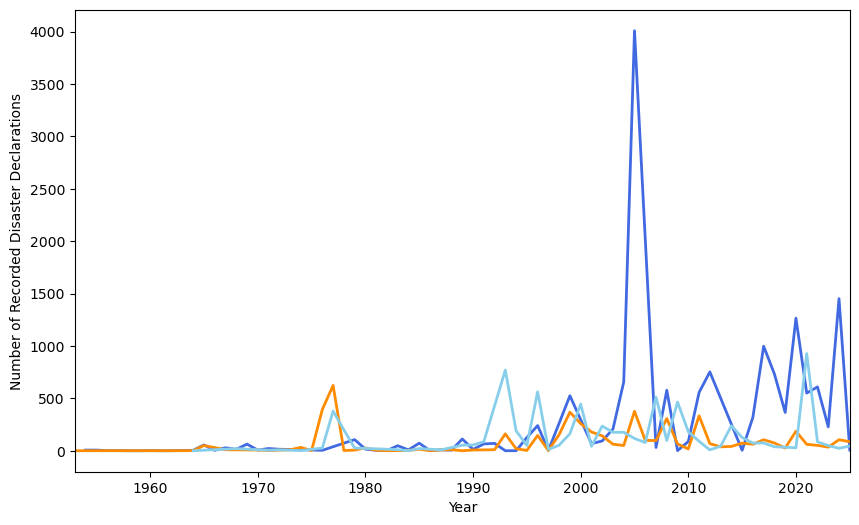

In [ ]:
# cli_years = cli.value_counts('year').reset_index()
# cli_years.sort_values('year')

cold_years = events_per_year(cold_cli)
dry_years = events_per_year(dry_cli)
coastal_years = events_per_year(coastal_cli)

fig = plt.figure(figsize = (10,6))
plt.plot(coastal_years['year'], coastal_years['count'], color = 'royalblue', linewidth = 2)
plt.plot(dry_years['year'], dry_years['count'], color = 'darkorange', linewidth = 2)
plt.plot(cold_years['year'], cold_years['count'], color = 'skyblue', linewidth = 2)
plt.xlim(1953, 2025)
plt.xlabel('Year')
plt.ylabel('Number of Recorded Disaster Declarations')
plt.show()

In [23]:
# Upon inspection - interesting - definite outliers here, especially with Katrina
# May be practical to remove Katrina from the analysis because it's so heavily skewing the visualizations

coastal_cli_no_katrina = coastal_cli[
    ~coastal_cli['declaration_title'].str.contains('Hurricane Katrina')
    ]

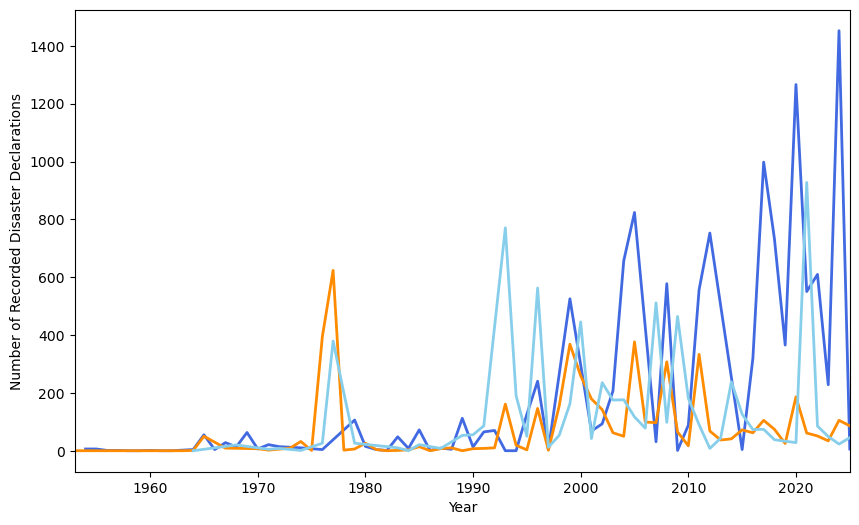

In [24]:
# Now with that filtered out, let's see how it looks
cold_years = events_per_year(cold_cli)
dry_years = events_per_year(dry_cli)
coastal_years_no_katrina = events_per_year(coastal_cli_no_katrina)

fig = plt.figure(figsize = (10,6))
plt.plot(coastal_years_no_katrina['year'], coastal_years_no_katrina['count'], color = 'royalblue', linewidth = 2)
plt.plot(dry_years['year'], dry_years['count'], color = 'darkorange', linewidth = 2)
plt.plot(cold_years['year'], cold_years['count'], color = 'skyblue', linewidth = 2)
plt.xlim(1953, 2025)
plt.xlabel('Year')
plt.ylabel('Number of Recorded Disaster Declarations')
plt.xticks(minor=True)
plt.show()

> This definitely paints a clearer picture. Extreme events are represented by the spikes, which is a bit messy at a glance.

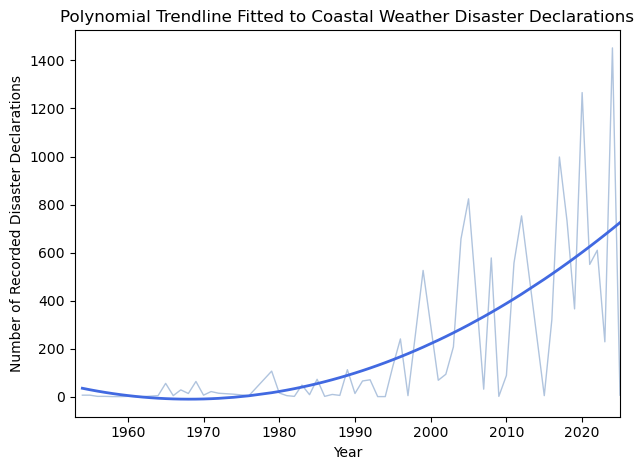

In [56]:
# Creating a trend line with numpy
coast_x = np.array(coastal_years_no_katrina['year'])
coast_y = np.array(coastal_years_no_katrina['count'])
z_coast = np.polyfit(coast_x,coast_y, 2)
p_coast = np.poly1d(z_coast)

plt.title("Polynomial Trendline Fitted to Coastal Weather Disaster Declarations")
plt.plot(coastal_years_no_katrina['year'], coastal_years_no_katrina['count'], color = 'lightsteelblue', linewidth = 1)
plt.plot(coast_x,p_coast(coast_x), color = 'royalblue', linewidth = 2)
plt.xlabel('Year')
plt.ylabel('Number of Recorded Disaster Declarations')
plt.tight_layout()
plt.xlim(1953, 2025)
plt.show()


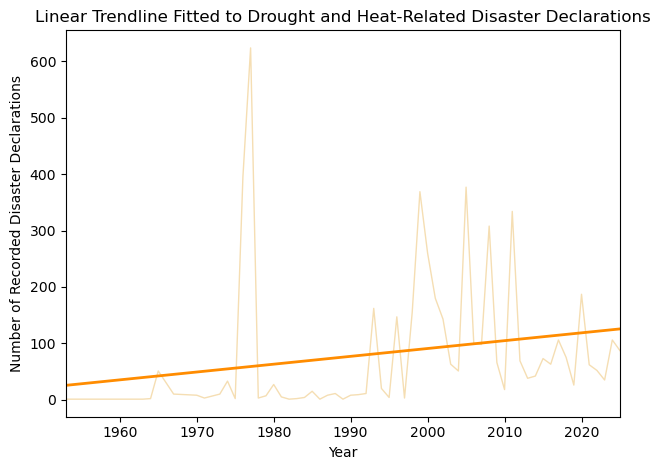

In [45]:
# Creating a trend line with numpy
dry_x = np.array(dry_years['year'])
dry_y = np.array(dry_years['count'])
z_dry = np.polyfit(dry_x,dry_y, 1)
p_dry = np.poly1d(z_dry)

plt.title("Linear Trendline Fitted to Drought and Heat-Related Disaster Declarations")
plt.plot(dry_years['year'], dry_years['count'], color = 'wheat', linewidth = 1)
plt.plot(dry_x,p_dry(dry_x), color = 'darkorange', linewidth = 2)
plt.xlabel('Year')
plt.ylabel('Number of Recorded Disaster Declarations')
plt.xlim(1953, 2025)

plt.tight_layout()
plt.show()


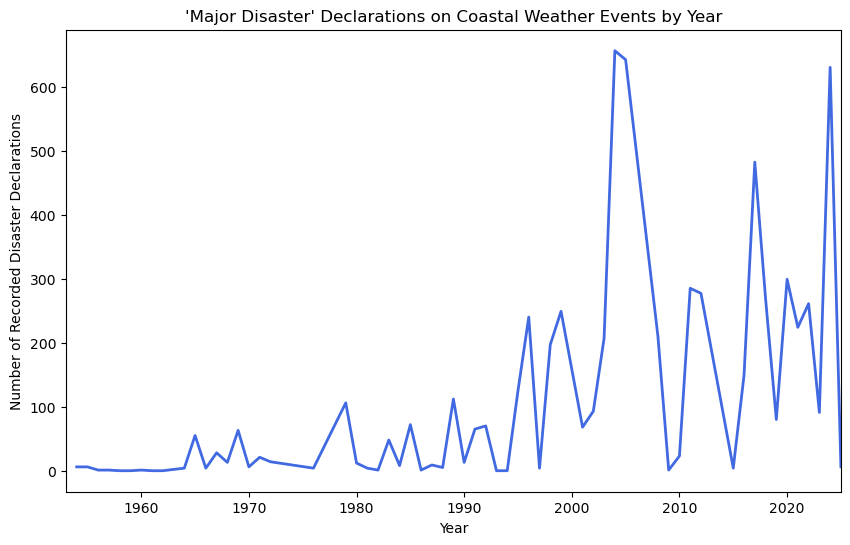

In [68]:
coastal_dr_by_yr = events_per_year(coastal_cli[coastal_cli['declaration_type']=='DR'])
fig = plt.figure(figsize = (10,6))
plt.plot(coastal_dr_by_yr['year'], coastal_dr_by_yr['count'], color = 'royalblue', linewidth = 2)
plt.xlim(1953, 2025)
plt.xlabel('Year')
plt.ylabel('Number of Recorded Disaster Declarations')
plt.title("'Major Disaster' Declarations on Coastal Weather Events by Year")
plt.xticks(minor=True)
plt.show()

Decided to filter down the data to the 'Major Disaster' declarations to see how different it might look - largely the same in regards to the overall pattern, cutting out EM and FM from the declaration_type is largely uninteresting and mostly just scales down all the numbers in the same dimension.

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

        > When divided into subsections, the results were remarkably coherent - the hurricane seasons, droughts, and cold weather crises were remarkably visible. Other than that, it was surprising how evident an upward trend was overall. On one hand, increase in declarations could be attributed to political and subjective reasons - a disaster is a somewhat subjective thing.
2. Do you have any concerns about your dataset? 
        
        > Subjectivity, as stated above. That said, this is just about the most objective dataset you can get regarding disasters. When mixed with the complex subjectivities of politics and built environs (e.g. the Hurricane Katrina crisis being so disproportionate to all others, from handling of information relay to the actual physical environs of Louisiana), and fluctuations in organizational funding may influence what is actually declared. E.g. It may be easy to attribute the upward trends of the graphs as increases in organizational capacity/funding or cultural/political willingness to declare disasters. You could chart this against a variety of factors such as administrative policy, funding changes, population increases, technological/civic engineering/code developments, inflation, media awareness, etc. It's very comfortable when data is objective and everything is fully known.
        
        To that end, you could theoretically collate all tornadoes, severe flooding events, storms, etc., though the amount of effort required and the amount of payoff may even end up holding you back and missing other events like severe windstorms, freezes, and droughts. Ultimately, while the data is beholden to the subjectivities of countless factors, this dataset is just about the most objective one can get regarding what constitutes a 'disaster' level event and we are forced to accept some subjectivity.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

        > Hurricane Katrina is a massive outlier and will skew any calculations or visualizations. It should be excluded for the purposes of that. Other than that, a few of the events in 'Other' can be sorted into climate categories.